# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    rolled = np.roll(arr,-1)
    res_arr = rolled[:-1][(rolled[:-1] - arr[:-1] == rolled[:-1])]
    if res_arr.size == 0:
        return None
    else:
        return newArr.max()

    
    

In [3]:
x = np.array([6, 2, 3, 1, 4, 5, 1,11, 2]) 
print(max_element(x))

None


Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [4]:
def nearest_value(X, v):
    return (np.abs(X - v)).argmin()

In [5]:
X = np.arange(0,10).reshape((5, 2))
v = 3
print(X)
print(nearest_value(X,v))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
3


Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [6]:
def scale(X):
    X_mean = X.mean(0)
    X_std = np.nanstd(X,0)
    X = X - X_mean
    return np.divide(X, X_std, out=np.zeros_like(X), where=X_std!=0)
    

In [7]:
X = np.random.randint(-150,151, size=(4, 4))
print(scale(X))

[[ 1.67009575 -0.01345589 -0.52948802 -0.60119553]
 [-0.92117389  1.6012511  -1.37370667 -1.28827613]
 [-0.57666983 -0.49786799  1.05527332  0.63340243]
 [-0.17225203 -1.08992722  0.84792137  1.25606923]]


 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [8]:
def get_stats(X):
    # Your code here
    det_x = np.linalg.det(X)
    trace_x = np.trace(X)
    min_x = X.min()
    max_x = X.max()
    fn_x = np.linalg.norm(X, 'fro')
    eig_x = np.linalg.eigvals(X)
    inv_x = np.linalg.inv(X)
    return det_x, trace_x, min_x, max_x, fn_x,eig_x,inv_x

In [9]:
#X = np.random.randint(, size=(3, 32))
X = np.random.normal(10, 1, (3, 3))
print (X)
print(get_stats(X))


[[10.36001381 10.47986663 11.73777262]
 [10.82403211  8.89896668 11.08328253]
 [10.66887727 10.32185055  8.41354471]]
(72.29069648940272, 27.672525203415855, 8.413544708139273, 11.737772618669311, 31.068899288267254, array([30.94216866, -1.0548858 , -2.21475766]), array([[-0.54679418,  0.45625108,  0.16180886],
       [ 0.37595022, -0.52654654,  0.1691375 ],
       [ 0.23214686,  0.0674208 , -0.29382751]]))


Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [10]:
avg_arr = []
for exp_num in range(100):
    # Your code here
    A = np.random.normal(0,1,(10, 10))
    B = np.random.normal(0,1,(10, 10))
    C = np.matmul(A,B)
    max_C = C.max()
    avg_arr.append(max_C)
avg = np.mean(avg_arr)
qn = np.quantile(avg_arr, 0.95)
print(avg, qn)

8.433697959211484 11.124268496848616


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [11]:
import pandas as pd
%matplotlib inline

Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [12]:
data = pd.read_csv('2008.csv')
data.head()
data['CancellationCode'].value_counts()
# Самая частая причина отмены рейса - carrier. Перевозчик сам отменил рейс.

A    563
B    549
C    299
Name: CancellationCode, dtype: int64

 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [13]:
# Your code here
min_d = data['Distance'].min()
max_d = data['Distance'].max()
mean_d = data['Distance'].mean()
min_d, max_d, mean_d

(31, 4962, 724.5082571428571)

 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [14]:
# Your code here
min_flights = data.loc[data['Distance'] == min_d]
min_flight_numbers = min_flights['FlightNum'].unique()
min_flight_days = min_flights[['DayofMonth','DayOfWeek']]
print(min_flight_numbers,min_flight_days)
ord_flights = data.loc[data['FlightNum'].isin(min_flight_numbers)][['Distance','FlightNum']]
ord_flights
# Рейсы с расстоянием 31 - это Alaska Airlines. Номера рейсов - 64 и 65. 
# При этом два из них были отменены по погодным условиям. Из пункта WRG->PSG и PSG->WRG.
# 31 miles - это расстояние от аэропорта PSG до WRG.
# Дни - 30 и 26 декабря, 18 и 9 августа, 28 февраля и 11 марта.

[65 64]        DayofMonth  DayOfWeek
1116           30          2
6958           26          5
17349          18          1
27534          11          2
46082           9          6
48112          28          4


,Distance,FlightNum
501,533,64
1116,31,65
1389,680,64
1517,680,65
2619,2381,64
...,...,...
66529,82,65
67172,533,64
68264,386,65
68338,2454,65


Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [15]:
# Your code here
airports_data = pd.read_csv("airports.csv") 
airport_id = data['Origin'].value_counts().idxmax()
city = airports_data.loc[airports_data['iata']==airport_id]['city']
print(airport_id)
print(city)

ATL
880    Atlanta
Name: city, dtype: object


Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [16]:
# Your code here
airports = data['Origin'].unique()
#print(airports)
max_ma = 0
max_id = ""
mean_airtime = []
for airport in airports:
    x = data.loc[data['Origin']==airport]["AirTime"].mean()
    if x > max_ma:
        max_ma = x
        max_id=airport
    mean_airtime.append(x)
    #break
print(max_ma, max_id)

205.2 SJU


Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [17]:
# Your code here
with_delay = data.loc[data['DepDelay']>0]
filtered = with_delay.groupby('Origin')['Origin'].count()[lambda x: x > 1000]
for airport in filtered.index:
    del_count = filtered[airport]
    total = data[(data['Origin'] == airport)]['Origin'].value_counts()[airport]
    print(airport, del_count/total)


ATL 0.42065795839380743
DEN 0.44607637431808644
DFW 0.45936269244539923
ORD 0.46450704225352113


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [18]:
# Your code here
import pandas as pd

df = pd.read_csv("2008.csv") 
print("Да")
print(df.isnull().sum().sum())
print(df.isnull().any(axis=1).sum())
print(df.isnull().any(axis=0).sum())

Да
355215
70000
16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [19]:
# Your code here
df = pd.read_csv("2008.csv") 

empty_DD = df["DepDelay"].isnull()
print(empty_DD.sum())
if df[empty_DD].loc[df['Cancelled'] == 1].size == df[empty_DD].size:
    print("Все рейсы с пустым значением DepDelay были отменены. (Cancelled = 1)")
# ДА, имеются пропущенные значения целевой переменной.
# Причина в том, что рейсы были отменены до вылета.
# Можно исключить признак Cancelled и CancellationCode, Year

df = df.drop(["Cancelled", "CancellationCode"], axis=1)
df = df[df['DepDelay'].notna()]
df = df[df['DepDelay'] != 0]
df

1399
Все рейсы с пустым значением DepDelay были отменены. (Cancelled = 1)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,CLE,307,3.0,8.0,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,AVL,834,4.0,12.0,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,TPA,997,4.0,9.0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,FCA,532,4.0,19.0,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,AUS,1090,4.0,8.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,BDL,661,12.0,13.0,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,ATL,606,22.0,20.0,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,GRR,137,4.0,13.0,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,MSP,1416,20.0,22.0,0,0.0,0.0,15.0,0.0,6.0


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [20]:
# Your code here
time_cols = ["DepTime", "CRSDepTime","ArrTime","CRSArrTime"]
hour_str = "_Hour"
min_str = "_Minute"

for time_col in time_cols:
    df[time_col+hour_str] = df[time_col] // 100
    df[time_col+min_str] = df[time_col] % 100
    df = df.drop([time_col],axis=1)
df

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9.0,20.0,9,25,11.0,10.0,11,18
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18.0,29.0,18,40,21.0,37.0,21,49
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11.0,49.0,11,25,13.0,36.0,13,14
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19.0,6.0,19,0,22.0,0.0,21,39


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

Исключаю все признаки вида * Delay, потому что в некоторых из них есть данные влияющие на DepDelay. ArrDelay тоже слишком зависит от DepDelay, и это возможно может повлиять. 

In [21]:
# Your code here

X = df.drop(["ArrDelay","CarrierDelay","WeatherDelay","LateAircraftDelay","SecurityDelay","NASDelay","TailNum","Year"], axis=1)
X

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,...,TaxiOut,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,16.0,MDW,...,8.0,0,21.0,11.0,20,55,23.0,8.0,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,16.0,IAH,...,12.0,0,14.0,26.0,14,10,17.0,30.0,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,-2.0,MDW,...,9.0,0,11.0,43.0,11,45,15.0,1.0,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,-3.0,SLC,...,19.0,0,11.0,41.0,11,44,13.0,23.0,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,-5.0,LAS,...,8.0,0,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,-5.0,CVG,...,13.0,0,9.0,20.0,9,25,11.0,10.0,11,18
69995,5,12,1,DL,794,128.0,129.0,86.0,-11.0,ORD,...,20.0,0,18.0,29.0,18,40,21.0,37.0,21,49
69996,5,11,7,OO,6159,47.0,49.0,30.0,24.0,ORD,...,13.0,0,11.0,49.0,11,25,13.0,36.0,13,14
69998,2,18,1,NW,641,234.0,219.0,192.0,6.0,RSW,...,22.0,0,19.0,6.0,19,0,22.0,0.0,21,39


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

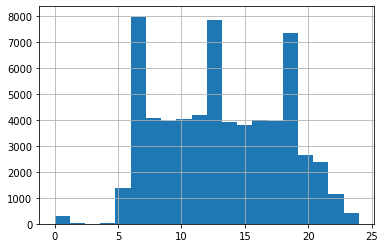

In [22]:
X['DepTime_Hour'].hist(bins=20)

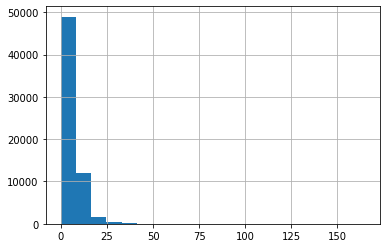

In [23]:
X['TaxiIn'].hist(bins=20)

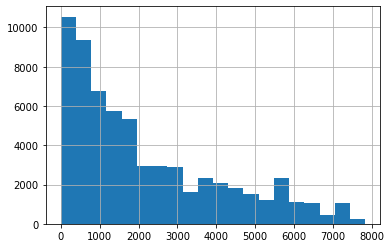

In [24]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [26]:
def transform_data(data):
    scaler = StandardScaler()
    onehot = OneHotEncoder()
    categ = []
    num = []
    for col in data:
        if data[col].dtypes == object:
            data[col] = data[col].fillna('nan')
            #data[col] = onehot.fit_transform(data[col].toarray(), columns=[])
            categ.append(col)
        else:
            data[col] = data[col].fillna(0)
            data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1)) 
            num.append(col)
    data = pd.get_dummies(data, columns = categ)
    return data
            
    

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [27]:
X_tr = transform_data(X)

In [28]:
X_tr

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,0.144971,-0.744130,-0.786908,...,0,0,0,0,0,0,0,0,0,0
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.144971,0.183961,-0.582387,...,0,0,0,0,0,0,0,0,0,0
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,-0.354394,0.471018,-0.582387,...,0,0,0,0,0,0,0,0,0,0
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.382136,-0.347886,-0.582387,...,0,0,0,0,0,0,0,0,0,0
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,-0.437621,0.634799,-0.582387,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.437621,-0.120706,1.053782,...,0,0,0,0,0,0,0,0,0,0
69995,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.604076,-0.217566,3.098994,...,0,0,0,0,0,0,0,0,0,0
69996,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,0.366910,-1.043514,-0.582387,...,0,0,0,0,0,0,0,0,0,0
69998,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,-0.132454,1.208912,2.689951,...,0,0,0,0,0,0,0,0,0,0


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [29]:
# Your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tr,X_tr['DepDelay'], test_size=0.3)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [30]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()  
#regressor.fit(X_train.head(1000), y_train.head(1000))
X_train_1000 = X_train.head(1000)
y_train_1000 = y_train.head(1000)
X_test_1000 = X_test.head(1000)
y_test_1000 = y_test.head(1000)
regressor.fit(X_train_1000, y_train_1000)
#y_train_pred = regressor.predict(X_train)
#y_pred = regressor.predict(X_test)

y_train_pred = regressor.predict(X_train_1000)
y_pred = regressor.predict(X_test_1000)

#print(regressor.coef_)

print(metrics.r2_score(y_train_1000, y_train_pred))
print(metrics.mean_squared_error(y_train_1000, y_train_pred))

print(metrics.r2_score(y_test_1000, y_pred))
print(metrics.mean_squared_error(y_test_1000, y_pred))

dff_tr = pd.DataFrame({'Actual': y_train_1000.values.flatten(), 'Predicted': y_train_pred.flatten()})
dff = pd.DataFrame({'Actual': y_test_1000.values.flatten(), 'Predicted': y_pred.flatten()})

print("Прогнозы получаются достаточно качественными, но судя по R2 и MSE модель \
строит прогнозы намного точнее по обучающим данным, чем по тестировочным")

1.0
6.692675563718331e-30
0.9999999797730786
1.413512712276722e-08
Прогнозы получаются достаточно качественными, но судя по R2 и MSE модель строит прогнозы намного точнее по обучающим данным, чем по тестировочным


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [31]:
# Your code here
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
alphas = 10**np.linspace(10,-2,100)*0.5


kf = KFold(n_splits=5)
for train, test in kf.split(X_tr.head(1000)):
    Lasso_regressor = LassoCV(alphas=alphas)
    Ridge_regressor = RidgeCV(alphas=alphas)
    #print("%s %s" % (train, test))
    X_train, X_test, y_train, y_test = X_tr.iloc[train], X_tr.iloc[test],X_tr['DepDelay'].iloc[train], X_tr['DepDelay'].iloc[test]
    
    Lasso_regressor.fit(X_train, y_train)
    y_train_pred = Lasso_regressor.predict(X_train)
    y_pred = Lasso_regressor.predict(X_test)
    print("Lasso best alpha = ", Lasso_regressor.alpha_)

    
    Ridge_regressor.fit(X_train, y_train)
    y_train_pred = Ridge_regressor.predict(X_train)
    y_pred = Ridge_regressor.predict(X_test)
    print("Ridge best alpha = ",Ridge_regressor.alpha_)

    print("**-------------------------------------------**")


Lasso_regressor = Lasso(alpha=0.005)
Ridge_regressor = Ridge(alpha=0.005)
Lasso_regressor.fit(X_train_1000, y_train_1000)
Ridge_regressor.fit(X_train_1000, y_train_1000)

y_train_pred = Lasso_regressor.predict(X_train_1000)
y_pred = Lasso_regressor.predict(X_test_1000)
print("Lasso:")
print("-train")
print(metrics.r2_score(y_train_1000, y_train_pred))
print(metrics.mean_squared_error(y_train_1000, y_train_pred))
print("-test")
print(metrics.r2_score(y_test_1000, y_pred))
print(metrics.mean_squared_error(y_test_1000, y_pred))
    
Ridge_regressor.fit(X_train_1000, y_train_1000)
y_train_pred = Ridge_regressor.predict(X_train_1000)
y_pred = Ridge_regressor.predict(X_test_1000)

print("Ridge:")
print("-train")
print(metrics.r2_score(y_train_1000, y_train_pred))
print(metrics.mean_squared_error(y_train_1000, y_train_pred))
print("-test")
print(metrics.r2_score(y_test_1000, y_pred))
print(metrics.mean_squared_error(y_test_1000, y_pred))



print("Теперь ошибка на обучающих и тестировочных данных примерно одинакова.")

Lasso best alpha =  0.005
Ridge best alpha =  0.005
**-------------------------------------------**
Lasso best alpha =  0.005
Ridge best alpha =  0.005
**-------------------------------------------**
Lasso best alpha =  0.005
Ridge best alpha =  0.005
**-------------------------------------------**
Lasso best alpha =  0.005
Ridge best alpha =  0.005
**-------------------------------------------**
Lasso best alpha =  0.005
Ridge best alpha =  0.005
**-------------------------------------------**
Lasso:
-train
0.9999901473820754
1.569444003826475e-05
-test
0.9999901233885932
6.9020468111861565e-06
Ridge:
-train
0.9999999999834845
2.630787886980025e-11
-test
0.9999999999464213
3.744225525629606e-11
Теперь ошибка на обучающих и тестировочных данных примерно одинакова.


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [32]:
# Your code here
X_tr['One'] = 1 

X_train, X_test, y_train, y_test = train_test_split(X_tr,X_tr['DepDelay'], test_size=0.3)

X_train = X_train.head(1000)
y_train = y_train.head(1000)
X_test = X_test.head(1000)
y_test = y_test.head(1000)

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [33]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.matmul(X, w.T)
    #pass

In [34]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    y_pred = make_pred(X, w)
    return np.mean(np.square((y - y_pred) / y), axis = 0)
    #pass

In [35]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    z = make_pred(X, w)
    n = y.shape[0] 
    dz = (2/n)*((z - y)/ y**2)    
    dw = np.matmul(dz.T, X)
    return dw

def mspe(y, y_pred):
     return np.mean(np.square(((y - y_pred) / y)), axis=0)

In [36]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, y, y_pred):
    return np.mean(np.square(((y - y_pred) / y)), axis=0) + np.square(np.linalg.norm(w))

In [37]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    z = make_pred(X, w)
    n = y.shape[0] 
    dz = (2/n)*((z - y)/ y**2)    
    dw = np.matmul(dz.T, X) + 2 * np.linalg.norm(w)
    return dw

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [38]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [39]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

SyntaxError: unexpected EOF while parsing (<ipython-input-39-88f4a77d924b>, line 2)

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу любимую картинку.